In [290]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters as filters
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
import os
import scipy as scipy
from PIL import Image
from skimage import color, data, restoration

In [744]:
folder='Data/NAPH3_Ba_5e-8M/Field1/'
#os.listdir(folder)

In [745]:
def get_image(folder,n):
    nstr=str(n).zfill(3)
    filename=[file for file in os.listdir(folder) if file[-7:-4]==nstr]
    fpath=folder+filename[-1]
    im=Image.open(fpath)
    imarray=np.array(im,dtype=np.int32)
    return imarray

In [746]:
def temporal_evolution(folder,N,roi=[0,512,0,512]):
    im0=get_image(folder,1)[roi[0]:roi[1],roi[2]:roi[3]]
    data0=np.zeros_like(im0)
    data=np.stack((data0,im0))
    for i in range (2,N):
        d=get_image(folder,i)[roi[0]:roi[1],roi[2]:roi[3]]
        data=np.append(data,[d],axis=0)
    data=np.delete(data,0,0)
    return data    

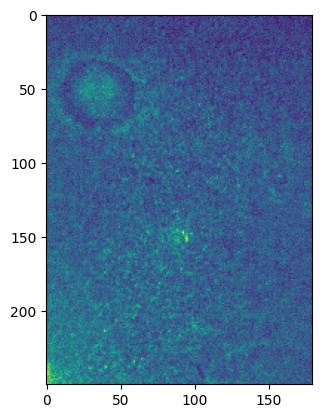

In [747]:
roi=[50,300,200,380]
plt.imshow(get_image(folder,1)[roi[0]:roi[1],roi[2]:roi[3]])

In [748]:
evol=temporal_evolution(folder,400,roi)

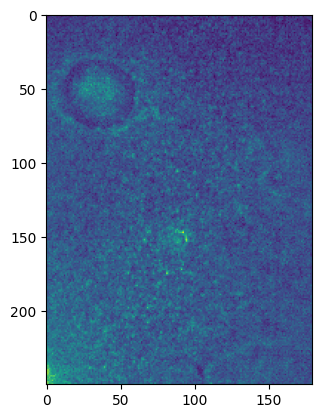

In [749]:
plt.imshow(evol[1])

In [750]:
def Condition(arr):
    T1=100 # minimum valueo of the derivative
    T2=60 # minimum difference between the mean before and after the step
    n0=6 # how many points to calculate mean
    bool=False
    if np.max(np.diff(arr))>T1:
        for i in np.where(np.diff(arr)>T1)[0]:
            if (i>n0)and(i<(np.size(arr)-n0)):
                if np.abs(np.mean(arr[int(i-n0):int(i)])-np.mean(arr[int(i+1):int(i+n0+1)]))>T2:
                    bool=True
    return bool                   
                
def Kernel_evol(evol,i,j):
    return 1/14*(10*evol[:,i,j]+evol[:,i+1,j]+evol[:,i-1,j]+evol[:,i,j+1]+evol[:,i,j-1])

In [751]:
np.sum(arr[10:13])

5478.285714285714

In [752]:
I,J=np.shape(evol[0])
points=[0,0]
for i in range(1,I-1):
    for j in range(1,J-1):
        arr=Kernel_evol(evol,i,j)
        if Condition(arr):
            points=np.vstack((points,[i,j]))
points=np.delete(points,0,0)            

In [753]:
print('There are {} pixels fullfilling the condition'.format(np.shape(points)[0]))

There are 74 pixels fullfilling the condition


198 59


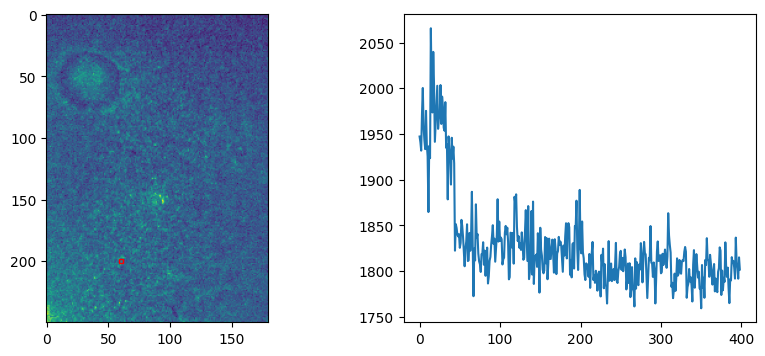

In [774]:
%matplotlib inline
n=45
i,j=points[n]
fig, ax = plt.subplots(1,2,figsize=(10, 4))
ax[0].imshow(get_image(folder,1)[roi[0]:roi[1],roi[2]:roi[3]])
rect = mpatches.Rectangle((j, i), 3,3,
                                  fill=False, edgecolor='red', linewidth=1)
ax[0].add_patch(rect)
ax[1].plot(Kernel_evol(evol,i,j))
print(i,j)